# <span style="color:RoyalBlue">Introducción a librerías básicas para uso científico</span>



## <span style="color:CornflowerBlue">**SciPy**</span>
[SciPy](https://scipy.org/) (**Sci**-entific **Py**-thon) es la biblioteca estándar de cálculo científico de Python.
Contiene módulos para optimización, álgebra lineal, integración, interpolación, funciones especiales, FFT, procesamiento de señales e imágenes, solucionadores de ODE y otras tareas comunes en ciencia e ingeniería 

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b2/SCIPY_2.svg" width = 300>

SciPy se basa y construye a partir de las herramientas para calcular y manipular matrices multidimensionales de manera eficiente que brinda Numpy. Proporciona un gran número de funciones que operan en matrices numpy.

## Inicio

El primer requisito, para trabajar con esta bibliotecas es importarla:

In [1]:
import scipy as sp

## Contenido de SciPy
Actualmente SciPy contiene 15 sub paquetes que se pueden importar independientemente y tienen diferentes utilidades:

* [cluster:](https://docs.scipy.org/doc/scipy/reference/cluster.html#module-scipy.cluster) contiene implementaciones para algoritmos de agrupaciones o clustering
* [constants:](https://docs.scipy.org/doc/scipy/reference/constants.html#module-scipy.constants) contiene la definición de varias constantes matemáticas y físicas
* [fft:](https://docs.scipy.org/doc/scipy/reference/fft.html#module-scipy.fft) implementa varias transformaciones como Transformada Rápida de Fourier, Transformaciones Discretas Seno y Coseno, Transformación Rápida de Hankel
* [integrate:](https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) funciones de integration y para resolver ecuaciones diferenciales ordinarias
* [interpolate:](https://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate) contiene varias alternativas para interpolación de datos
* [io:](https://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io) contiene módulos para leer y escribir diferentes tipos de archivos
* [linalg:](https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg) módulos de álgebra lineal
* [ndimage:](https://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage) funciones para el procesamiento de imágenes multidimensionales
* [odr:](https://docs.scipy.org/doc/scipy/reference/odr.html#module-scipy.odr) implementación de regresión de distancia ortogonal
* [optimize:](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) funciones para minimizar funciones objetivo
* [signal:](https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal) funciones para el procesamiento de señales
* [sparse:](https://docs.scipy.org/doc/scipy/reference/sparse.html#module-scipy.sparse) funciones para operar numéricamente con matrices 2-D esparsas
* [spatial:](https://docs.scipy.org/doc/scipy/reference/spatial.html#module-scipy.spatial) algoritmos y estructuras de datos espaciales
* [special:](https://docs.scipy.org/doc/scipy/tutorial/special.html) implementa varias funciones matemáticas: airy, bessel, beta, hypergeometric, mathieu y kelvin
* [stats:](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) varias funciones para cálculos estadísticos y de correlaciones


### Interpolación
Una de las funcionalidades interesantes para trabajar con datos es la interpolación. Supongamos que tenemos muestras de una función coseno:

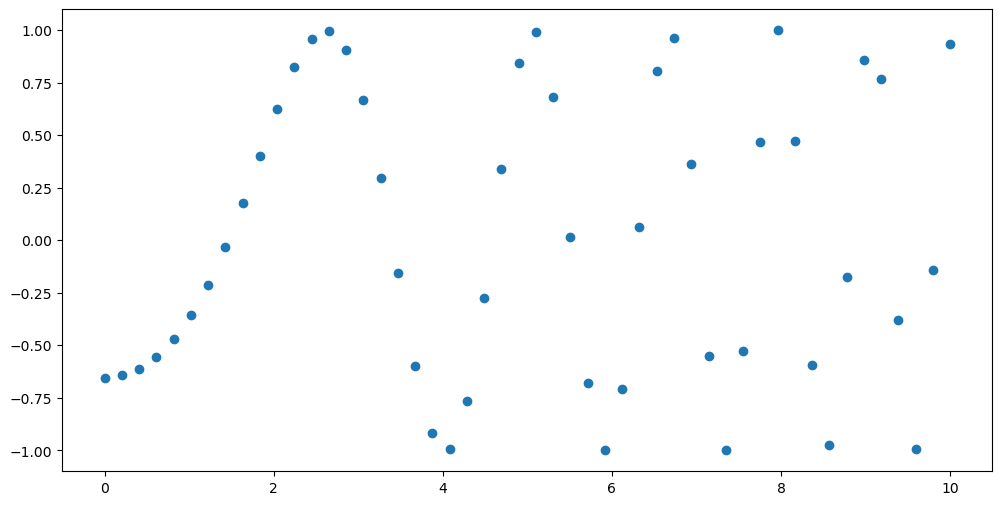

In [25]:
import numpy as np  
import matplotlib.pyplot as plt  

x = np.linspace(0, 10, 50)  # puntos del eje horizontal
y = np.cos((x**2) / 3 + 4)  # puntos del eje vertical

# Graficamos
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'o')
plt.show()

Y que queremos interpolar esta función para puntos intermedios. Eso se puede hacer con el subpaquete *interpolate*.

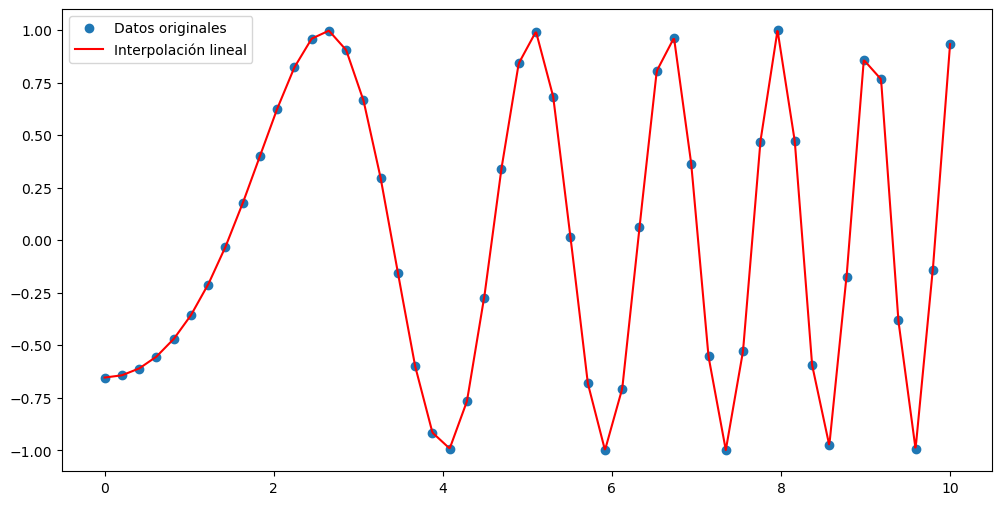

In [26]:
from scipy import interpolate

# Definimos una función de interpolación lineal con los datos originales
fun_lin = interpolate.interp1d(x, y, kind = 'linear')  
# Puntos que se quieren interpolar
x_new = np.linspace(0, 10, 1000)  
# Realizamos la interpolación
y_interp = fun_lin(x_new)

# Graficamos los puntos originales más los interpolados
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'o', x_new, y_interp, '-r')  
plt.legend(['Datos originales', 'Interpolación lineal'])  
plt.show()

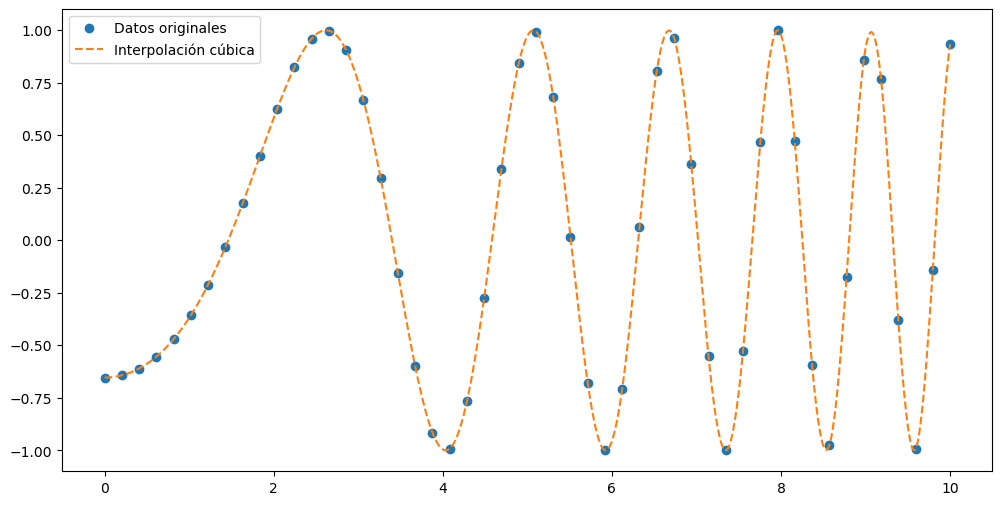

In [27]:
# Generamos otra función de interpolación: interpolación cúbica
fun_cub = interpolate.interp1d(x, y, kind = 'cubic')  
# Aplicamos la función de interpolación a los puntos deseados
y_interp_2 = fun_cub(x_new)

# Graficamos los puntos originales más los interpolados
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'o', x_new, y_interp_2, '--')  
plt.legend(['Datos originales', 'Interpolación cúbica'])   
plt.show()

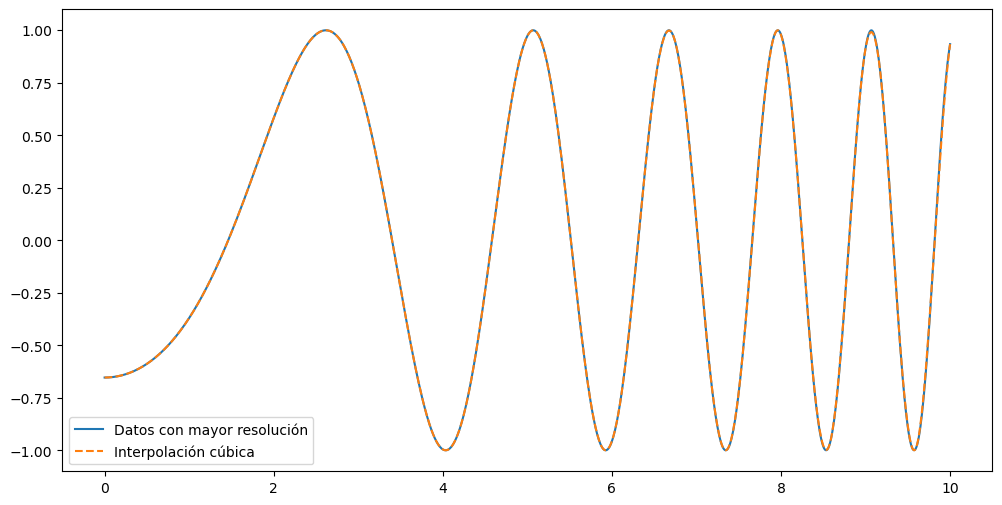

In [28]:
# Aplicamos la función original a todos los puntos intermedios que habíamos aproximado por interpolación cúbica
y2 = y = np.cos((x_new**2) / 3 + 4)

# Graficamos los puntos originales más los interpolados
plt.figure(figsize=(12, 6))
plt.plot(x_new, y2, '-', x_interp, y_interp_2, '--')  
plt.legend(['Datos con mayor resolución', 'Interpolación cúbica'])   
plt.show()

## DFT y FFT

Supongamos que tenemos una señal con esta forma

<img src="images/waves_with_3sine.jpg" width=500>

Usando la DFT, podemos descomponer esta señal a una serie de sinusoides, donde cada una de ellas tendrá una frecuencia diferente

<img src="images/time_frequency.png" width=500>

### DFT

La DFT se define como

<img src="images/dft_eq.png">

donde
- $N$ = cantidad de muestras de la señal en el tiempo
- $n$ = muestra actual de la señal en el tiempo
- $k$ = frecuencia actual, donde $k∈[0,N−1]$
- $x_n$ = valor de la función seño en la muestra $n$
- $X_k$ = valor de la DFT en la frecuencia $k$, la cual incluye la información tanto de la amplitud como de la fase

En Python podemos definir una función de la forma:

In [44]:
def dft(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
      
    return X

Vamos a probar esta función y la compararemos con la función FFT que trae implementado SciPy

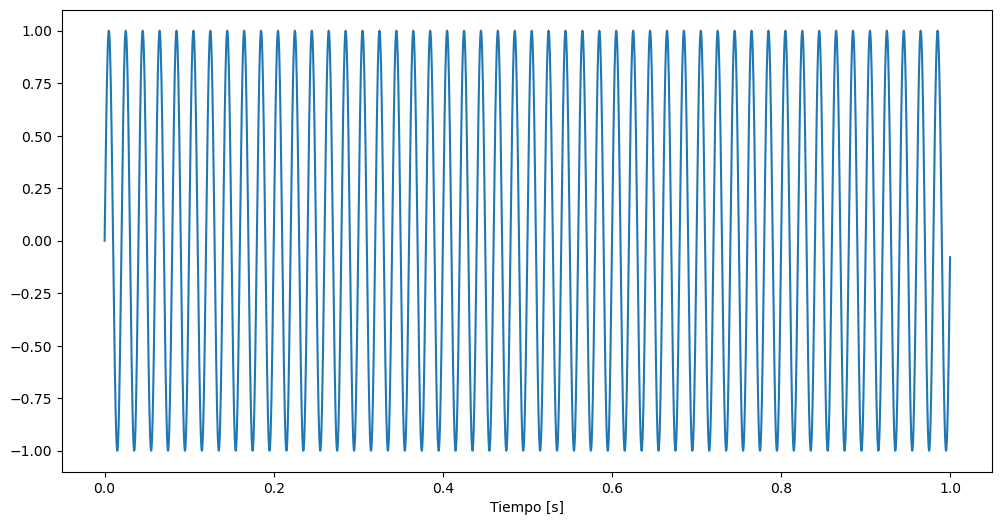

In [57]:
def generate_sine_wave(freq, sample_rate, duration):
    t = np.linspace(0, duration, sample_rate * duration, endpoint=False)  # vector de tiempos (samples)
    y = np.sin(2 * np.pi * freq * t)
    return t, y

# Generamos onda seno con duración específica
frequency = 50  # Hertz
duration = 1  # seconds
sample_rate = 4000  # Hertz
t, x = generate_sine_wave(frequency, sample_rate, duration)

# Graficación
plt.figure(figsize=(12, 6))
plt.plot(t, x)
plt.xlabel('Tiempo [s]')
plt.show()

En primer lugar, realizamos la DFT

In [59]:
%timeit X = dft(x)

1.17 s ± 21.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


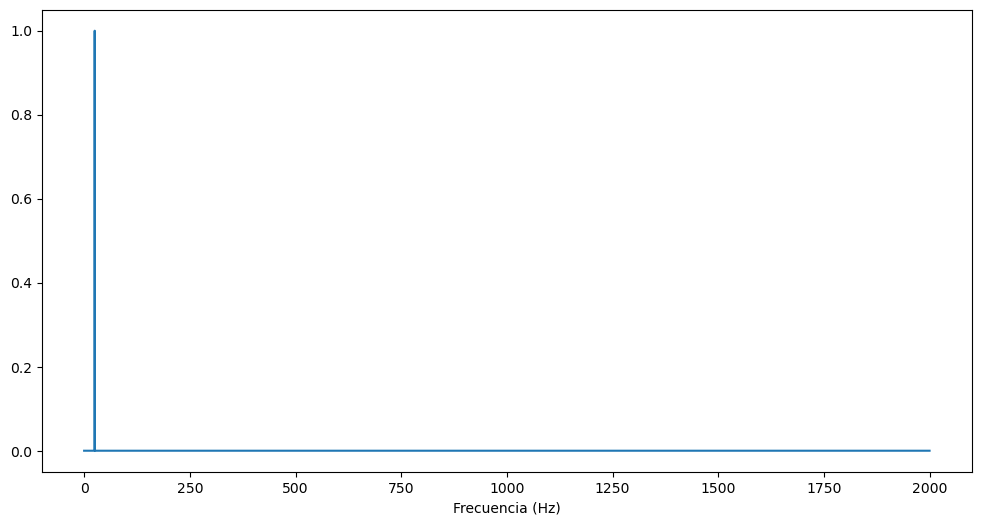

In [108]:
# Graficación
# Primero calculamos el vector de frecuencias
N = len(X)
n = np.arange(N)
T = N / sample_rate
freq = n/T 
n_oneside = N // 2
f_oneside = freq[:n_oneside]  # como el espectro es simétrico (señal real), obtenemos sólo una mitad del espectro
X_oneside = X[:n_oneside] / n_oneside  # normalizamos la amplitud

plt.figure(figsize = (12, 6))
plt.plot(f_oneside, abs(X_oneside))
plt.xlabel('Frecuencia (Hz)')
plt.show()

Ahora, realizamos la FFT

In [109]:
from scipy.fft import rfft, rfftfreq

In [110]:
%timeit X2 = rfft(x)  # transformada discreta de Fourier a partir de una señal con números reales

51.4 µs ± 2.54 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


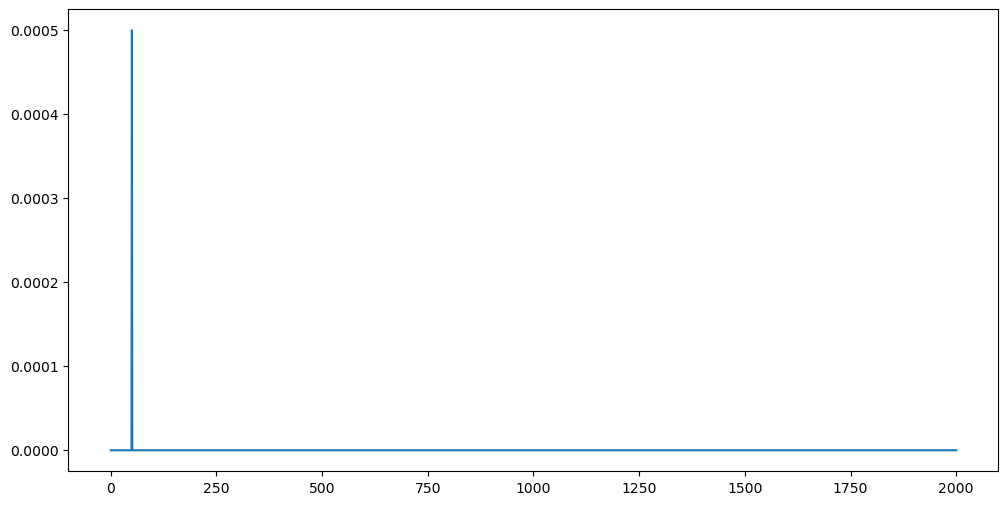

In [104]:
X2_dB = 20 * np.log10(np.abs(X2))  # tambi´calculamos dB
X2 = X2 / (x.size / 2)
freq = rfftfreq(x.size, 1 / sample_rate)  # genera las frecuencias para la FFT

plt.figure(figsize = (12, 6))
plt.plot(freq, np.abs(X2))
plt.xlabel('Frecuencia (Hz)')
plt.show()

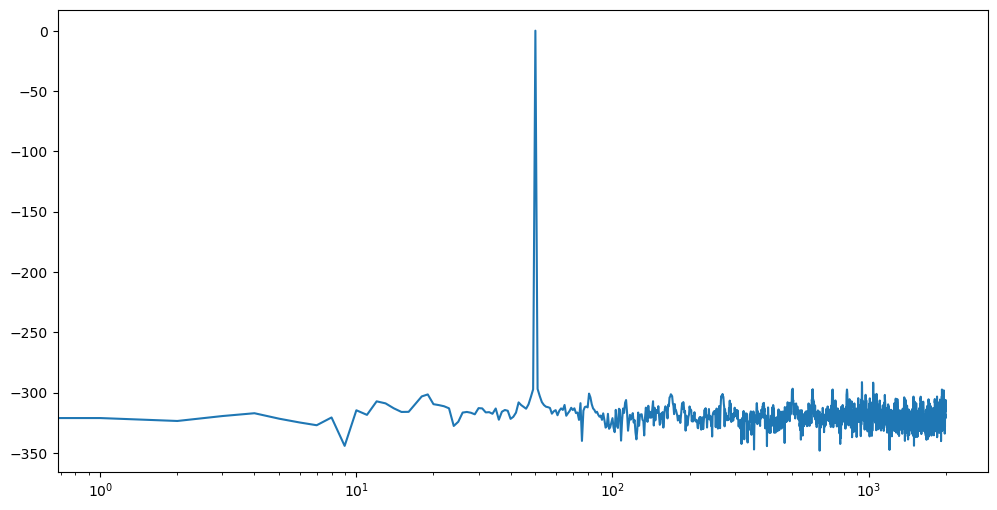

In [107]:
# Graficación en escala log-log
plt.figure(figsize = (12, 6))
plt.semilogx(freq, X2_dB)
plt.xlabel('Frecuencia (Hz)')
plt.show()